In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
import os
import shutil
import random

In [36]:
# vgg16_model=tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet',input_tensor=Input(shape=(224,224,3)))

In [37]:
# vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# model1.add(AveragePooling2D(pool_size=(4,4)))
# model1.add(Flatten())
# model1.add(Dense(256,activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(64,activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(3,activation='softmax'))

In [7]:
# import os
# import shutil

In [9]:
# shutil.copy2('drive/My Drive/Dataset/Dataset.zip','.')

'./Dataset.zip'

In [10]:
# from zipfile import ZipFile
# fname='Dataset1.zip'
# with ZipFile(fname,'r') as zip:
#   zip.extractall()
#   print('done')

done


In [11]:
# files = os.listdir('covid')
# cnt=0
# for f in files:
#   cnt+=1
# print(cnt)

427


In [12]:
# shutil.rmtree('covid')

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [5]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 1.65G/1.65G [00:11<00:00, 150MB/s]
100% 1.65G/1.65G [00:11<00:00, 159MB/s]


In [6]:
from zipfile import ZipFile
fname='/content/chest-xray-covid19-pneumonia.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
import random
os.chdir('Data')
os.mkdir('val')
os.mkdir('val/COVID19')
os.mkdir('val/NORMAL')


valid_samples=random.sample(os.listdir('test/COVID19'),60)
for i in valid_samples:
  shutil.move(f'test/COVID19/{i}',f'val/COVID19/{i}') 

valid_samples=random.sample(os.listdir('test/NORMAL'),150)
for i in valid_samples:
  shutil.move(f'test/NORMAL/{i}',f'val/NORMAL/{i}') 


os.chdir('../')

In [9]:
os.chdir('Data')
shutil.rmtree('test/PNEUMONIA')
shutil.rmtree('train/PNEUMONIA')
os.chdir('../')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [11]:
train_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.2,
    shear_range=.2,
    horizontal_flip=True
                                       )

test_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                       )
valid_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                       )

In [12]:
train_path='Data/train'
test_path='Data/test'
val_path='Data/val'

In [13]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

valid_gen=valid_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

Found 1726 images belonging to 2 classes.
Found 223 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [14]:
vgg16_model=tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet',input_tensor=Input(shape=(224,224,3)))

58892288/58889256 [==============================] - 0s 0us/step


In [15]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [59]:
model=Sequential()
for layer in vgg16_model.layers[:-4]:
  model.add(layer)

In [60]:
for layer in model.layers:
  layer.trainable=False

In [61]:
model.add(AveragePooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [62]:
INIT_LR = 1e-3
EPOCHS = 15
BS = 8

In [63]:
from tensorflow.keras.optimizers import Adam

In [64]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [65]:
model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [66]:
model.fit(train_gen,validation_data=valid_gen,epochs=15,batch_size=128,shuffle=True,verbose=2)

Epoch 1/15
54/54 - 57s - loss: 19.1787 - accuracy: 0.8830 - val_loss: 1.6170 - val_accuracy: 0.9714
Epoch 2/15
54/54 - 57s - loss: 4.8286 - accuracy: 0.9525 - val_loss: 0.3220 - val_accuracy: 0.9952
Epoch 3/15
54/54 - 57s - loss: 2.3456 - accuracy: 0.9699 - val_loss: 0.2468 - val_accuracy: 0.9905
Epoch 4/15
54/54 - 57s - loss: 1.8211 - accuracy: 0.9733 - val_loss: 0.3830 - val_accuracy: 0.9905
Epoch 5/15
54/54 - 56s - loss: 1.4699 - accuracy: 0.9803 - val_loss: 0.4422 - val_accuracy: 0.9905
Epoch 6/15
54/54 - 57s - loss: 1.4019 - accuracy: 0.9733 - val_loss: 0.7041 - val_accuracy: 0.9952
Epoch 7/15
54/54 - 57s - loss: 1.1535 - accuracy: 0.9826 - val_loss: 0.0587 - val_accuracy: 0.9952
Epoch 8/15
54/54 - 56s - loss: 0.5354 - accuracy: 0.9844 - val_loss: 0.5221 - val_accuracy: 0.9905
Epoch 9/15
54/54 - 58s - loss: 0.6991 - accuracy: 0.9803 - val_loss: 0.4919 - val_accuracy: 0.9905
Epoch 10/15
54/54 - 59s - loss: 0.6962 - accuracy: 0.9849 - val_loss: 0.4360 - val_accuracy: 0.9905
Epoch 11

In [67]:
predictions=model.predict(test_gen)

In [71]:
model.predict(test_gen)

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 6.5144109e-28],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 7.9542522e-17],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.9900614e-19],
       [1.0559358e-09, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.

In [68]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [69]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[ 13  43]
 [ 42 125]]


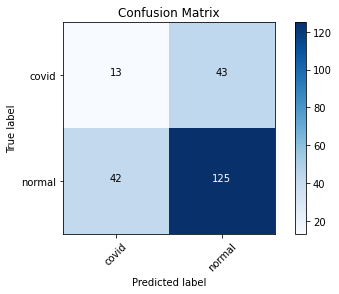

In [70]:
cm_plot_labels=['covid','normal']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')